In [44]:
CHOSEN_PROMPT = 'Please summarize the following text: {TEXT}'  # somewhere in promptset. Will find idx later

SEED_PROMPTS = [
CHOSEN_PROMPT,
f"{CHOSEN_PROMPT}. Think step by step.",
f"{CHOSEN_PROMPT}. Take a deep breath.",
f"{CHOSEN_PROMPT}. Be concise and clear.",
f"{CHOSEN_PROMPT}. You are a summarization expert.",
f"{CHOSEN_PROMPT}. Explain your answer in simple terms.",
f"{CHOSEN_PROMPT}. You are a helpful assistant.",
# Prompt1 from Suggest Prompt
"""#### Instruction ####

Summarize the following text:

#### Input ####

{TEXT}

#### Expected Response Format ####

[Your summary]""",
# Prompt2 from Suggest Prompt
"""**Instruction**: Summarize the following text:

**{TEXT}**

**Example:**

* Summarize the following text:
> The United States is a large country with a diverse population. It is made up of 50 states, each with its own unique culture and history. The United States is a global superpower and has a significant influence on world affairs.

### Answer: ###
* The United States is a large, diverse country with 50 states, each with its own unique culture and history. As a global superpower, the United States exerts significant influence on world affairs.

**Additional Instructions:**

* Please ensure that your summary captures the key points of the text.
* Use clear and concise language.
* You MUST adhere to the specified word limit.
* You will be penalized if your summary is not responsive to the text.""",
# Prompt3 from Suggest Prompt
"""###Instruction###

Summarize the following text:

###Input###
{TEXT}

###Your task is###

Generate a concise and accurate summary of the input text.

###You MUST###

* Write in clear and concise language.
* Cover all the main points of the text.
* Keep the summary within 500 words.

###You will be penalized if###

* Your summary is incomplete or inaccurate.
* Your summary exceeds the 500-word limit.

###Answer in a natural, human-like manner###

Pretend you are a highly skilled human summarizing the text.

###Example###
* **QUESTION:** Summarize the following text:
{{EXAMPLE TEXT}}
* **SUMMARY:** {{EXAMPLE SUMMARY}}

###TIP###
I'm going to tip $5 for a better summary!""",
# Prompt4 from Suggest Prompt
"""###Instruction###
Your task is to summarize the following text:


###Example###
{TEXT}


You MUST answer in a natural, human-like manner. You will be penalized for not following these instructions.
###Question###
{TEXT}""",
# Prompt5 from Suggest Prompt
"""###Instruction###
Provide a concise summary of the following text:
{TEXT}
###Example###
Input: Here is the provided request: \"Summarize this research paper: Effects of Climate Change on Marine Ecosystems\"
Output: Marine ecosystems face significant threats from climate change, including rising sea temperatures, ocean acidification, and altered weather patterns. These changes disrupt ecological balances, leading to loss of biodiversity, shifts in species distribution, and reduced productivity.
###Question###
Your task is to generate a concise and informative summary of the provided text. Ensure your response is clear, concise, and free from errors. You MUST adhere to the formatting guidelines and provide a single cohesive summary. If you fail to meet these requirements, you will be penalized.
Answer in a natural, human-like manner and ensure your response is comprehensive and covers the main points of the provided text.""",
]

SEED_PROMPTS

['Please summarize the following text: {TEXT}',
 'Please summarize the following text: {TEXT}. Think step by step.',
 'Please summarize the following text: {TEXT}. Take a deep breath.',
 'Please summarize the following text: {TEXT}. Be concise and clear.',
 'Please summarize the following text: {TEXT}. You are a summarization expert.',
 'Please summarize the following text: {TEXT}. Explain your answer in simple terms.',
 'Please summarize the following text: {TEXT}. You are a helpful assistant.',
 '#### Instruction ####\n\nSummarize the following text:\n\n#### Input ####\n\n{TEXT}\n\n#### Expected Response Format ####\n\n[Your summary]',
 '**Instruction**: Summarize the following text:\n\n**{TEXT}**\n\n**Example:**\n\n* Summarize the following text:\n> The United States is a large country with a diverse population. It is made up of 50 states, each with its own unique culture and history. The United States is a global superpower and has a significant influence on world affairs.\n\n### A

In [45]:
import statistics
import matplotlib.pyplot as plt
import json
SAVE_PATH = "synthetic_summarization_OPRO_results.json"

# load opro.json
with open(SAVE_PATH) as f:
    opro_results = json.load(f)

opro_results["0"] = {}
count = 0
for key in opro_results["1"]:
    if key in SEED_PROMPTS:
        opro_results["0"][key] = opro_results["1"][key]
opro_results["0"]

# sort opro_results by keys
opro_results = dict(sorted(opro_results.items(), key=lambda item: int(item[0])))

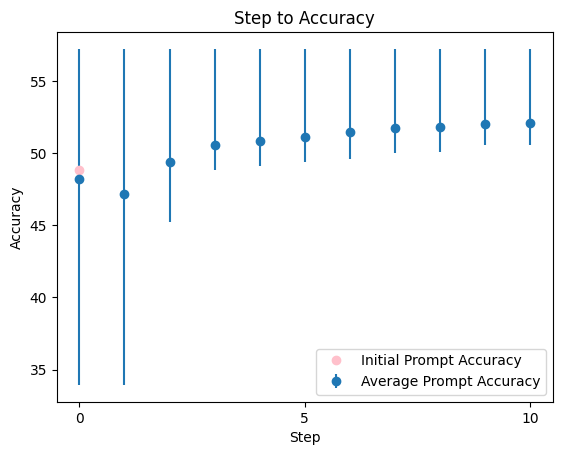

In [46]:
step_to_accuracy = {
    step: (
        statistics.mean(opro_results[step].values()),
        max(opro_results[step].values()),
        min(opro_results[step].values()),
    )
    for step in opro_results
}

# Plot step to accuracy as a continuous line graph, including stdevs as highlighted error bars
fig, ax = plt.subplots()
ax.errorbar(
    step_to_accuracy.keys(),
    [accuracy[0] for accuracy in step_to_accuracy.values()],
    yerr=[
        [accuracy[0] - accuracy[2] for accuracy in step_to_accuracy.values()],  # Lower errors
        [accuracy[1] - accuracy[0] for accuracy in step_to_accuracy.values()]   # Upper errors
    ],
    fmt="o",
)

ax.set_xticks([step for step in step_to_accuracy.keys() if int(step) % 5 == 0])
ax.set_xlabel("Step")
ax.set_ylabel("Accuracy")
ax.set_title("Step to Accuracy")

# Add a pink point to the plot
ax.plot(0, opro_results["0"][CHOSEN_PROMPT], 'o', color='pink')

# Add legend to show pink dot is initial prompt accuracy, blue dot is avg prompt accuracy
ax.legend(["Initial Prompt Accuracy", "Average Prompt Accuracy"], loc="lower right")


In [47]:
opro_results[str(len(opro_results) - 1)]

{'**Instruction**: Summarize the following text:\n\n**{TEXT}**\n\n**Example:**\n\n* Summarize the following text:\n> The United States is a large country with a diverse population. It is made up of 50 states, each with its own unique culture and history. The United States is a global superpower and has a significant influence on world affairs.\n\n### Answer: ###\n* The United States is a large, diverse country with 50 states, each with its own unique culture and history. As a global superpower, the United States exerts significant influence on world affairs.\n\n**Additional Instructions:**\n\n* Please ensure that your summary captures the key points of the text.\n* Use clear and concise language.\n* You MUST adhere to the specified word limit.\n* You will be penalized if your summary is not responsive to the text.': 57.20792197129059,
 '**Optimal Summary Creation Framework**\n\n#### Directive:\n\nCraft a brief yet thorough summary of the specified text.\n\n#### Text for Summary:\n{TEXT

In [48]:
best_instruction = max(
    opro_results[str(len(opro_results) - 1)], key=opro_results[str(len(opro_results) - 1)].get
)
print(best_instruction)

**Instruction**: Summarize the following text:

**{TEXT}**

**Example:**

* Summarize the following text:
> The United States is a large country with a diverse population. It is made up of 50 states, each with its own unique culture and history. The United States is a global superpower and has a significant influence on world affairs.

### Answer: ###
* The United States is a large, diverse country with 50 states, each with its own unique culture and history. As a global superpower, the United States exerts significant influence on world affairs.

**Additional Instructions:**

* Please ensure that your summary captures the key points of the text.
* Use clear and concise language.
* You MUST adhere to the specified word limit.
* You will be penalized if your summary is not responsive to the text.
